# **QUALITY PREDICTION IN A MINING PROCESS**

## Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Project10_Quality Prediction in a Mining Process'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Project10_Quality Prediction in a Mining Process/Project10_Quality Prediction in a Mining Process.docx
/content/drive/MyDrive/Project10_Quality Prediction in a Mining Process/Project10_Quality Prediction in a Mining Process/MiningProcess_Flotation_Plant_Database.csv


## Load data to Dataframe

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Project10_Quality Prediction in a Mining Process/Project10_Quality Prediction in a Mining Process/MiningProcess_Flotation_Plant_Database.csv')

In [ ]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [ ]:
data.isnull()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
737449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
737450,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
737451,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Drop date column
data_cl=data.drop('date',axis=1)
data_cl.head(5)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [ ]:
data_cl.head(5)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [ ]:
data_cl.info() #precleaning data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

# **Data Exploration**

##Data Correleation

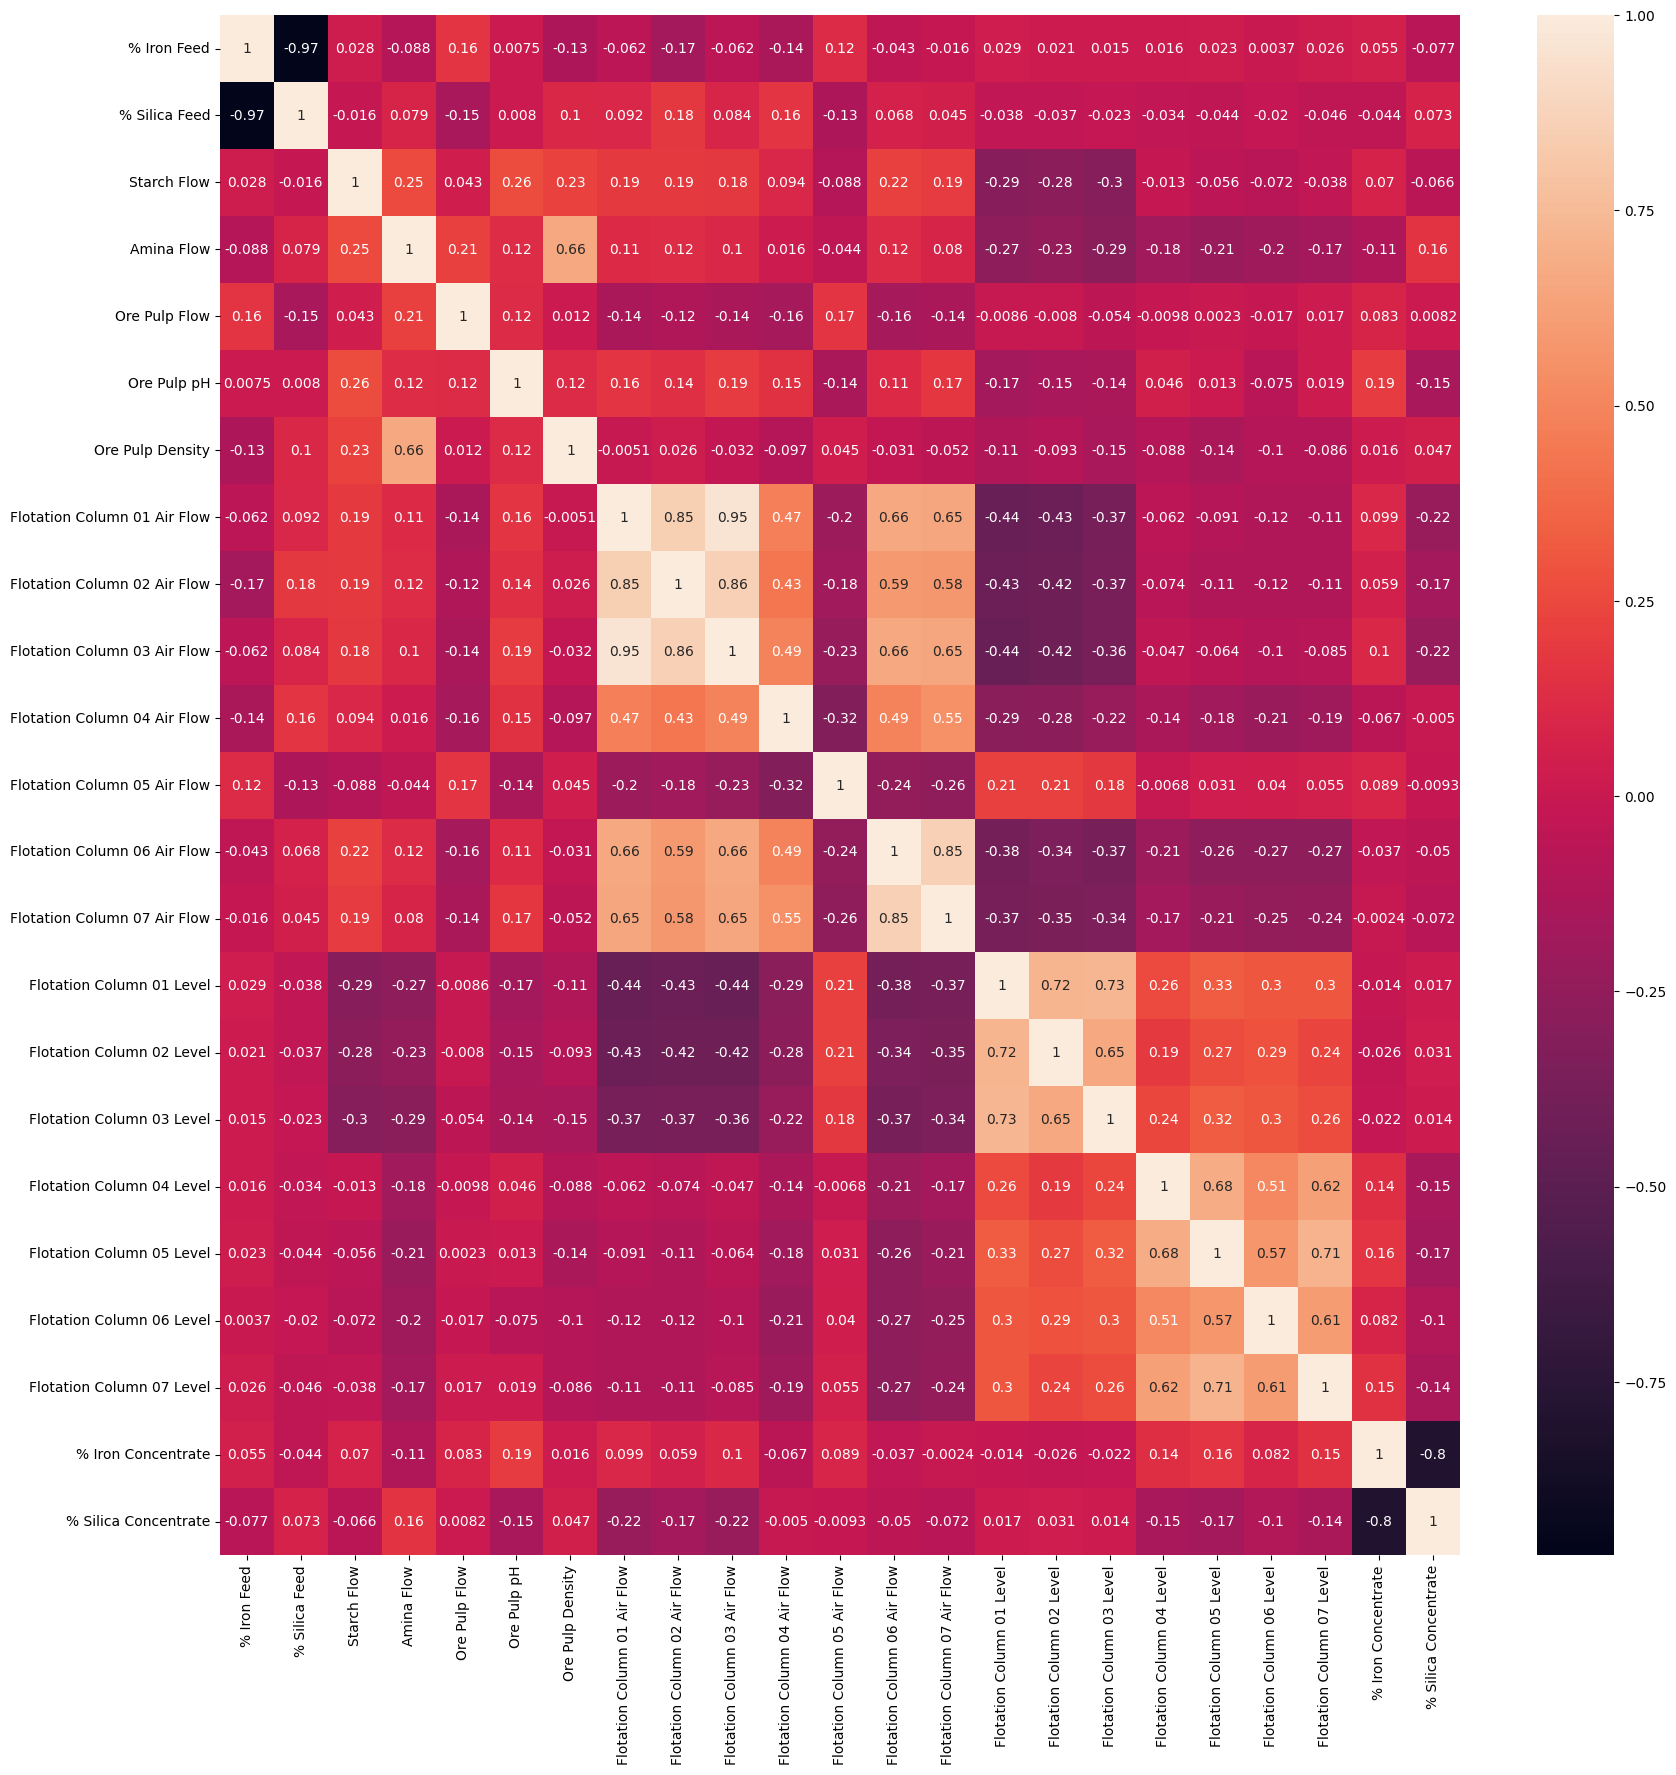

In [ ]:
plt.figure(figsize=(20,20))
sn.heatmap(data_cl.corr(), annot=True)
plt.show()

In [ ]:
data_cl.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

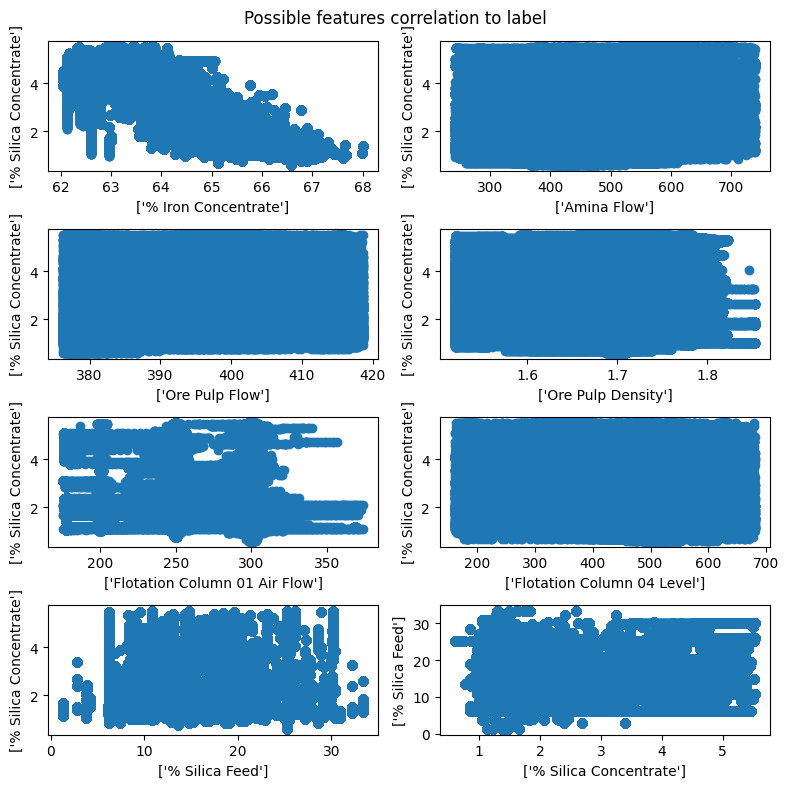

In [ ]:
## Feature vs Label Correlation Plot

fig, axs =plt.subplots(4,2,figsize=(8, 8))
fig.suptitle('Possible features correlation to label')


axs[0,0].scatter(data_cl['% Iron Concentrate'],data_cl['% Silica Concentrate'])
axs[0,0].set_xlabel(['% Iron Concentrate'])
axs[0,0].set_ylabel(['% Silica Concentrate'])

axs[0,1].scatter(data_cl['Amina Flow'],data_cl['% Silica Concentrate'])
axs[0,1].set_xlabel(['Amina Flow'])
axs[0,1].set_ylabel(['% Silica Concentrate'])

axs[1,0].scatter(data_cl['Ore Pulp Flow'],data_cl['% Silica Concentrate'])
axs[1,0].set_xlabel(['Ore Pulp Flow'])
axs[1,0].set_ylabel(['% Silica Concentrate'])

axs[1,1].scatter(data_cl['Ore Pulp Density'],data_cl['% Silica Concentrate'])
axs[1,1].set_xlabel(['Ore Pulp Density'])
axs[1,1].set_ylabel(['% Silica Concentrate'])

axs[2,0].scatter(data_cl['Flotation Column 01 Air Flow'],data_cl['% Silica Concentrate'])
axs[2,0].set_xlabel(['Flotation Column 01 Air Flow'])
axs[2,0].set_ylabel(['% Silica Concentrate'])

axs[2,1].scatter(data_cl[ 'Flotation Column 04 Level'],data_cl['% Silica Concentrate'])
axs[2,1].set_xlabel([ 'Flotation Column 04 Level'])
axs[2,1].set_ylabel(['% Silica Concentrate'])


axs[3,0].scatter(data_cl['% Silica Feed'],data_cl['% Silica Concentrate'])
axs[3,0].set_xlabel(['% Silica Feed'])
axs[3,0].set_ylabel(['% Silica Concentrate'])


axs[3,1].scatter(data_cl['% Silica Concentrate'],data_cl['% Silica Feed'])
axs[3,1].set_xlabel(['% Silica Concentrate'])
axs[3,1].set_ylabel(['% Silica Feed'])


plt.tight_layout()

In [ ]:
# Select Possible features, drop other column

data_cl.columns
droplist=['% Iron Feed','Starch Flow',\
          'Ore Pulp pH','Flotation Column 02 Air Flow',\
          'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',\
          'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',\
          'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
          'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 05 Level',
          'Flotation Column 06 Level', 'Flotation Column 07 Level',]

data_cl=data_cl.drop(droplist,axis=1)
data_cl.shape

(737453, 8)

In [ ]:
#Polynomial Feature Engineering

data_cl['% Iron Concentrate_power2']=data_cl['% Iron Concentrate']**2

data_cl

,% Silica Feed,Amina Flow,Ore Pulp Flow,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 04 Level,% Iron Concentrate,% Silica Concentrate,% Iron Concentrate_power2
0,16.98,557.434,395.713,1.74000,249.214,443.558,66.91,1.31,4476.9481
1,16.98,563.965,397.383,1.74000,249.719,448.086,66.91,1.31,4476.9481
2,16.98,568.054,399.668,1.74000,249.741,449.688,66.91,1.31,4476.9481
3,16.98,568.665,397.939,1.74000,249.917,446.210,66.91,1.31,4476.9481
4,16.98,558.167,400.254,1.74000,250.203,453.670,66.91,1.31,4476.9481
...,...,...,...,...,...,...,...,...,...
737448,23.20,441.052,386.570,1.65365,302.344,418.725,64.27,1.71,4130.6329
737449,23.20,473.436,384.939,1.65352,303.013,418.377,64.27,1.71,4130.6329
737450,23.20,500.488,383.496,1.65338,303.662,419.531,64.27,1.71,4130.6329
737451,23.20,491.548,384.976,1.65324,302.550,407.299,64.27,1.71,4130.6329


## **Training & Selection Regression Model**

In [ ]:
data_cl.columns

Index(['% Silica Feed', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 04 Level',
       '% Iron Concentrate', '% Silica Concentrate',
       '% Iron Concentrate_power2'],
      dtype='object')

In [ ]:
## Split data to training set and test set

from sklearn.model_selection import train_test_split

X=data_cl.drop('% Silica Concentrate',axis=1)

y=data_cl['% Silica Concentrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(737453,)
(589962,)
(147491,)


In [ ]:
# normalize the training data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_train_norm,axis=0)}")

Peak to Peak range by column in Raw        X:% Silica Feed                    32.09000
Amina Flow                      497.83500
Ore Pulp Flow                    42.39200
Ore Pulp Density                  0.33343
Flotation Column 01 Air Flow    198.31300
Flotation Column 04 Level       518.13900
% Iron Concentrate                5.96000
% Iron Concentrate_power2       775.15760
dtype: float64
Peak to Peak range by column in Normalized X:[4.71237465 5.45648833 4.36995836 4.81436396 6.69849509 5.64380306
 5.32601578 5.34806669]


In [ ]:
# Define Validation Function

from sklearn.model_selection import cross_validate

def model_trainval(model,x,y):

    scoring = ['neg_root_mean_squared_error', 'r2']
    scores = cross_validate(model, x, y, scoring=scoring)
    RMSE = scores['test_neg_root_mean_squared_error'].mean()
    R2 = scores['test_r2'].mean()
    print("Result of Model Validation")
    print(f"RMSE : {RMSE}")
    print(f"R2 :{R2}")

    return RMSE,R2

In [ ]:
### Linear Regression Model with Regularization Term (Lassso)

from sklearn.linear_model import Lasso

reg1=Lasso(alpha=0.001)

## Model Training & Cross Validation

[RMSE, R2]=model_trainval(reg1,X_train_norm,y_train)

RMSE_Col=[]
R2_Col=[]

RMSE_Col.append(RMSE)
R2_Col.append(R2)

Result of Model Validation
RMSE : -0.6431862685248335
R2 :0.6736489449129742


In [ ]:
### Linear Regression Model with Regularization Term (Ridge Model)

from sklearn.linear_model import Ridge

reg2=Ridge(alpha=0.001)

## Model Training & Cross Validation

[RMSE,R2]=model_trainval(reg2,X_train_norm,y_train)

RMSE_Col.append(RMSE)
R2_Col.append(R2)

Result of Model Validation
RMSE : -0.6344440866450249
R2 :0.6824595124215526


In [ ]:
### Random Forest Tree Model

from sklearn.ensemble import RandomForestRegressor

reg3=RandomForestRegressor(max_depth=10,n_estimators=10)

## Model Training & Cross Validation

[RMSE,R2]=model_trainval(reg3,X_train_norm,y_train)

RMSE_Col.append(RMSE)
R2_Col.append(R2)

Result of Model Validation
RMSE : -0.41009546206569764
R2 :0.8673104224079298


[Text(0.48935931899641577, 0.9545454545454546, 'x[7] <= -0.572\nsquared_error = 1.269\nsamples = 373071\nvalue = 2.328'),
 Text(0.24554771505376344, 0.8636363636363636, 'x[6] <= -1.117\nsquared_error = 1.0\nsamples = 96687\nvalue = 3.722'),
 Text(0.1310577210274791, 0.7727272727272727, 'x[7] <= -1.861\nsquared_error = 0.685\nsamples = 53364\nvalue = 4.165'),
 Text(0.06940710872162485, 0.6818181818181818, 'x[0] <= 0.751\nsquared_error = 0.581\nsamples = 22554\nvalue = 4.352'),
 Text(0.03576762246117085, 0.5909090909090909, 'x[0] <= 0.189\nsquared_error = 0.61\nsamples = 16646\nvalue = 4.233'),
 Text(0.018891875746714457, 0.5, 'x[0] <= -0.05\nsquared_error = 0.526\nsamples = 12095\nvalue = 4.353'),
 Text(0.009557945041816009, 0.4090909090909091, 'x[6] <= -2.43\nsquared_error = 0.608\nsamples = 6811\nvalue = 4.203'),
 Text(0.0047789725209080045, 0.3181818181818182, 'x[4] <= -0.951\nsquared_error = 0.44\nsamples = 1993\nvalue = 4.55'),
 Text(0.0023894862604540022, 0.22727272727272727, 'x[1

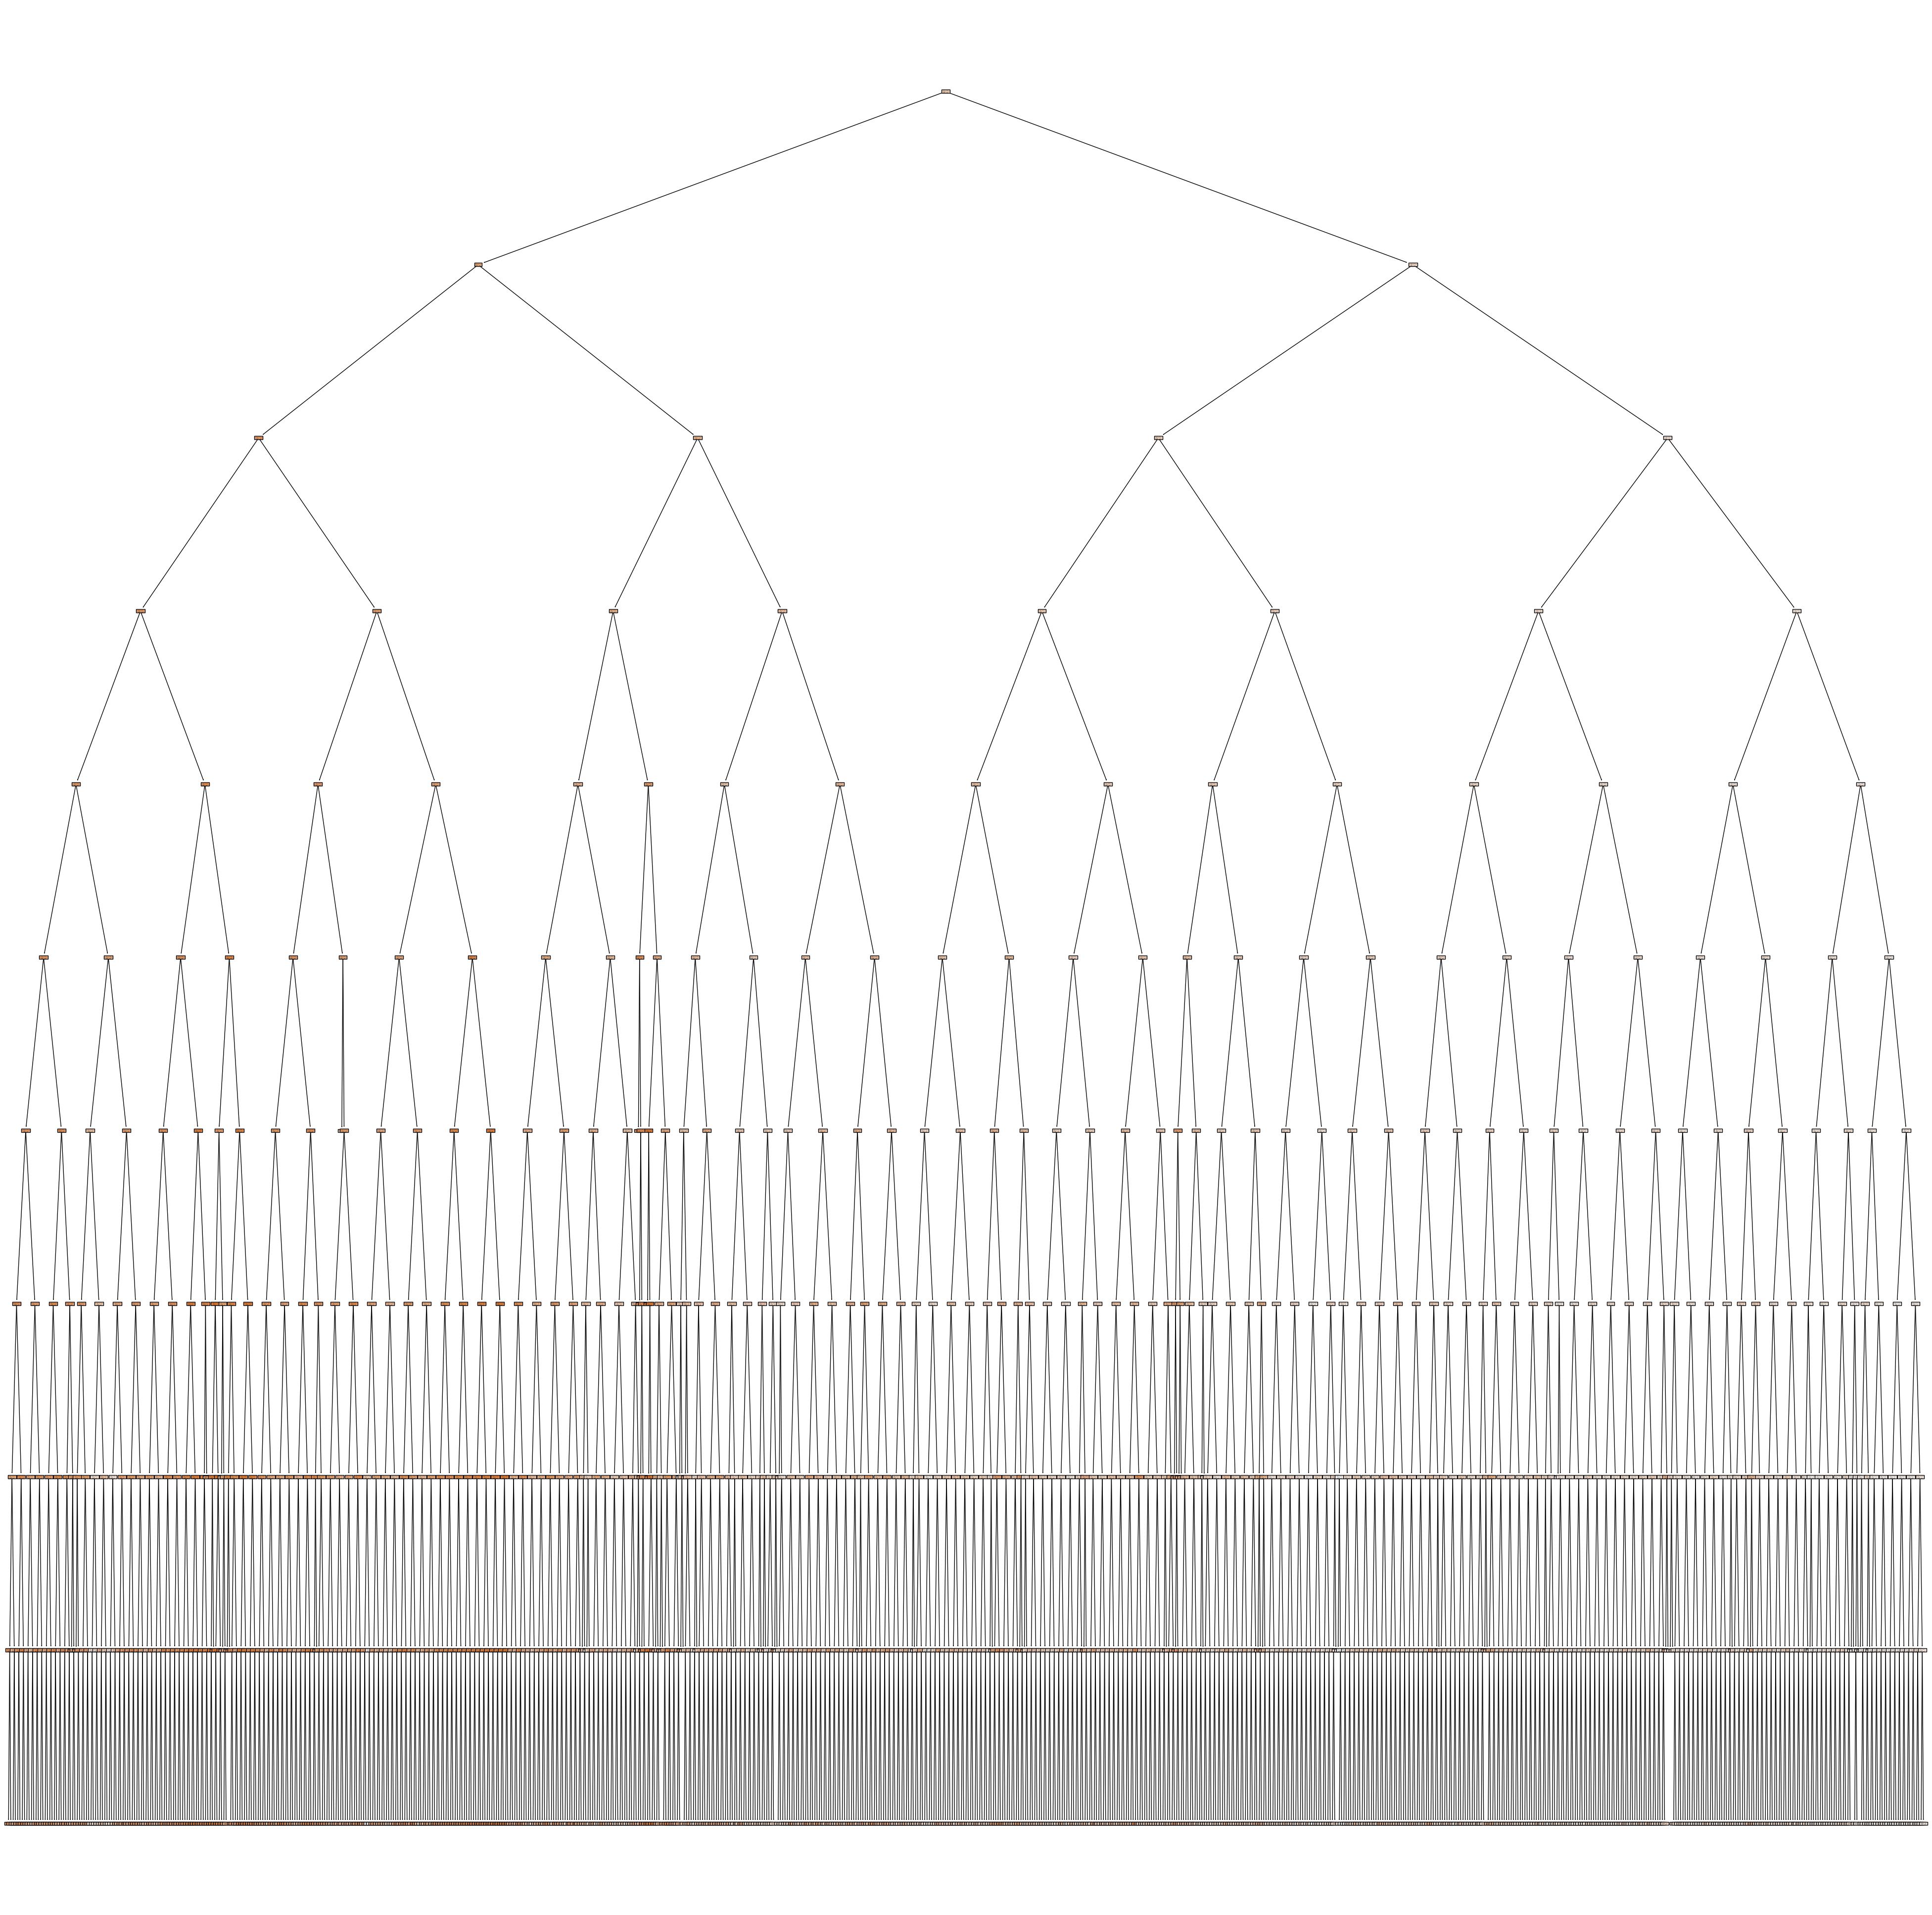

In [ ]:
# Tree graphic model

reg3.fit(X_train_norm,y_train)

plt.figure(figsize=(50,50))

from sklearn.tree import plot_tree

plot_tree(reg3.estimators_[0],filled=True)

In [ ]:
print(RMSE_Col,R2_Col)

[-0.6431862685248335, -0.6344440866450249, -0.41032326953809023] [0.6736489449129742, 0.6824595124215526, 0.8671548810160237]


<function matplotlib.pyplot.show(close=None, block=None)>

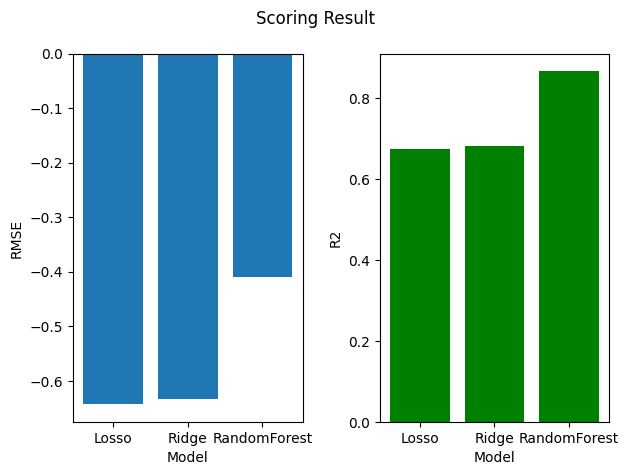

In [ ]:
# plot graph performance comparison each pre-selected model

Xgraph=['Losso','Ridge','RandomForest']

fig,axes=plt.subplots(nrows=1,ncols=2)

fig.suptitle("Scoring Result")
axes[0].bar(Xgraph,RMSE_Col)
axes[0].set_xlabel("Model")
axes[0].set_ylabel("RMSE")

axes[1].bar(Xgraph,R2_Col,color='g')
axes[1].set_xlabel("Model")
axes[1].set_ylabel("R2")

plt.tight_layout()
plt.show

# **Model Testing**

In [ ]:
# normalize the test data

scaler = StandardScaler()
X_test_norm = scaler.fit_transform(X_test)


## Prediction
y_pred=reg3.predict(X_test_norm)

## Evaluation

from sklearn.metrics import mean_squared_error, r2_score

RMSE_Testing=mean_squared_error(y_test,y_pred)
R2_Testing=r2_score(y_test,y_pred)

print(f"RMSE of test result : {RMSE_Testing} ")
print(f"R2 of test result : {R2_Testing} ")

RMSE of test result : 0.18024030115609668 
R2 of test result : 0.8573848381147843 


In [ ]:
#Built Dataframe for test result

result_label=pd.DataFrame()

result_label['% silica concentrate']=y_test
result_label['predicted % silica concentrate']=y_pred

In [ ]:
print(result_label.reset_index().head(50))

     index  % silica concentrate  predicted % silica concentrate
0   198870              3.540000                        4.056380
1    18768              1.300000                        1.877279
2    19259              2.080000                        2.068084
3   616058              1.450000                        1.415192
4     5905              2.970000                        2.932365
5   292500              1.180000                        1.119433
6   278272              1.570000                        1.903550
7   605221              5.520000                        4.047005
8   559308              2.920000                        2.245281
9   132395              4.927199                        4.739038
10  133474              4.501191                        4.759518
11   32119              4.280000                        4.232242
12  350034              2.180000                        2.371360
13  229427              5.050000                        4.453508
14  682341              1